In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import umap as um 
import seaborn as sns


In [3]:
#Cash Indicator Ratio
cash_ind_ratio = pd.read_excel('features/Cash_Indicator_Ratio/abm_ratio_analysis.xlsx')

#Debit Credit Ratio
debit_credit_ratio = pd.read_csv('features/Debit_Credit_Ratio/credit_debit_ratio.csv')

#High Risk Transaction Flag
high_risk_flag = pd.read_csv('features/HighRiskTransactionFlag/customer_high_value_summary.csv')

#customer city summary
customer_city_summary = pd.read_csv('features/section3/updated_city_summary.csv')

# Transaction Volume and Frequency
transaction_volume_freq = pd.read_csv('Transaction Volume and Frequency.csv')

#features 4 and 5
features_4_5 = pd.read_csv('features/section_4_5/features_4_5.csv')


In [4]:
transaction_volume_freq.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)

In [5]:
transaction_volume_freq.rename(columns = {'customer ID':'customer_id'}, inplace = True)

In [6]:
cash_ind_ratio = cash_ind_ratio.sort_values('customer_id')
cash_ind_ratio.reset_index(drop = True, inplace = True)

debit_credit_ratio = debit_credit_ratio.sort_values('customer_id')
debit_credit_ratio.reset_index(drop = True, inplace = True)

high_risk_flag = high_risk_flag.sort_values('customer_id')
high_risk_flag.reset_index(drop = True, inplace = True)

customer_city_summary = customer_city_summary.sort_values('customer_id')
customer_city_summary.reset_index(drop = True, inplace = True)

transaction_volume_freq = transaction_volume_freq.sort_values('customer_id')
transaction_volume_freq.reset_index(drop = True, inplace = True)

features_4_5 = features_4_5.sort_values('customer_id')
features_4_5.reset_index(drop = True, inplace = True)


In [7]:
# Total unique customers
print(f"Total unique customers in cash indicator ratio: {len(cash_ind_ratio)}")
print(f"Total unique customers in debit credit ratio: {len(debit_credit_ratio)}")
print(f"Total unique customers in high risk flag: {len(high_risk_flag)}")
print(f"Total unique customers in customer city summary: {len(customer_city_summary)}")
print(f"Total unique customers in transaction volume and frequency: {len(transaction_volume_freq)}")
print(f"Total unique customers in features 4 and 5: {len(features_4_5)}")


Total unique customers in cash indicator ratio: 16226
Total unique customers in debit credit ratio: 16226
Total unique customers in high risk flag: 16226
Total unique customers in customer city summary: 16226
Total unique customers in transaction volume and frequency: 16226
Total unique customers in features 4 and 5: 16226


In [8]:
# Total features
print("Total features in cash indicator ratio: ", len(cash_ind_ratio.columns))
print("Total features in debit credit ratio: ", len(debit_credit_ratio.columns))
print("Total features in high risk flag: ", len(high_risk_flag.columns))
print("Total features in customer city summary: ", len(customer_city_summary.columns))
print("Total features in transaction volume and frequency: ", len(transaction_volume_freq.columns))
print("Total features in features 4 and 5: ", len(features_4_5.columns))

Total features in cash indicator ratio:  3
Total features in debit credit ratio:  3
Total features in high risk flag:  7
Total features in customer city summary:  2
Total features in transaction volume and frequency:  43
Total features in features 4 and 5:  54


In [9]:
features = {
    'cash_indicator_ratio': cash_ind_ratio,
    'debit_credit_ratio': debit_credit_ratio,
    'high_risk_flag': high_risk_flag,
    'customer_city_summary': customer_city_summary,
    'transaction_volume_freq': transaction_volume_freq,
    'features_4_5': features_4_5
}

customer_ID = cash_ind_ratio['customer_id']

for key, value in features.items():
    for i, customer in enumerate(customer_ID):
        if customer != value['customer_id'][i]:
            print(f"Customer {customer} is not present in {key}")
            break

In [10]:
for key, value in features.items():
    print(f"Stats for {key}")
    print(value.info())
    print("\n\n")

Stats for cash_indicator_ratio
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16226 entries, 0 to 16225
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       16226 non-null  object 
 1   abm_count_ratio   16226 non-null  float64
 2   abm_amount_ratio  16226 non-null  float64
dtypes: float64(2), object(1)
memory usage: 380.4+ KB
None



Stats for debit_credit_ratio
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16226 entries, 0 to 16225
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                16226 non-null  object 
 1   credit_total_amount_ratio  16226 non-null  float64
 2   debit_total_amount_ratio   16226 non-null  float64
dtypes: float64(2), object(1)
memory usage: 380.4+ KB
None



Stats for high_risk_flag
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16226 entr

In [11]:
combined_df = pd.concat([cash_ind_ratio, debit_credit_ratio.drop(columns=['customer_id']), high_risk_flag.drop(columns=['customer_id']), customer_city_summary.drop(columns=['customer_id']), transaction_volume_freq.drop(columns=['customer_id']), features_4_5.drop(columns=['customer_id'])], axis=1)
print(combined_df.shape)


(16226, 107)


In [12]:
feature_stats = combined_df.describe(percentiles=[0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99, 0.999, .9999, 0.99999, 0.999999]).loc[['count', 'mean', 'min', 'max', '20%', '40%', '60%', '80%', '90%', '95%', '99%', '99.9%', '99.99%', '99.999%', '99.9999%']].transpose()

In [13]:
combined_df.to_csv('training_data.csv', index=False)

In [14]:
combined_df.shape

(16226, 107)

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df.drop(columns=['customer_id']))

In [38]:
pca = PCA(n_components=50)
pca.fit(scaled_features)
pca_features = pca.transform(scaled_features)

In [39]:
pca_features.shape

(16226, 50)

In [40]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(pca_features)
tsne_result.shape

(16226, 2)

In [41]:
clf = IsolationForest(max_samples='auto', random_state=0)

In [42]:
# clf.fit(pca_features)
predicted_lables = clf.fit_predict(pca_features)

In [43]:
np.count_nonzero(predicted_lables == -1)

444

In [45]:
reducer = um.UMAP()
embedding = reducer.fit_transform(pca_features)
embedding.shape

/Users/gurpreetmukker/Desktop/Projects/BigDeepStrongData/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(16226, 2)

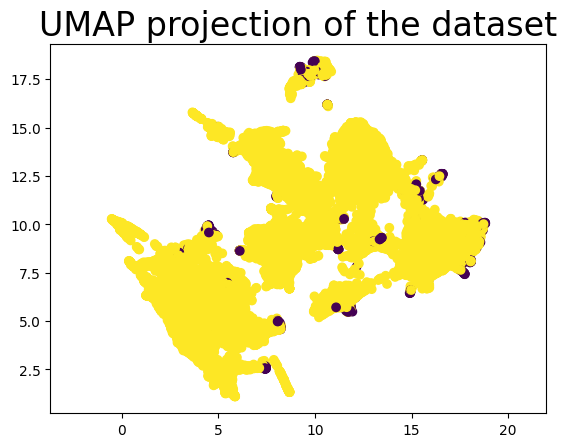

In [46]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    # c= np.zeros(embedding.shape[0]))
    c = predicted_lables)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);

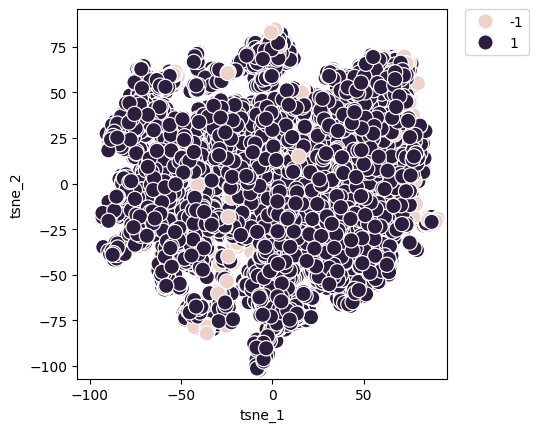

In [44]:
y = predicted_lables
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)